# The North Face ecommerce

## Preprocessing of textual data

Importing librairies.

In [129]:
# Data manipulation
import pandas as pd

# ML
from sklearn.cluster import DBSCAN
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# NLP
import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS

# Vizualisation
import matplotlib.pyplot as plt
import wordcloud

# OS
import os

# RegEx
import re

Loading data.

In [130]:
# Load data from CSV file
corpus = pd.read_csv(os.getcwd()+"/data/sample-data.csv", index_col="id")

corpus.head()

,description
id,
1,Active classic boxers - There's a reason why o...
2,Active sport boxer briefs - Skinning up Glory ...
3,Active sport briefs - These superbreathable no...
4,"Alpine guide pants - Skin in, climb ice, switc..."
5,"Alpine wind jkt - On high ridges, steep ice an..."


Exploring first documents of the corpus, to determine which preprocessing are needed.

In [131]:
# Print 5 first documents
for i in range(5):
    print(corpus.iloc[i]["description"])

Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry"</li> <li>"Exposed, brushed elastic waistband for comfort"</li> <li>5-panel construction with traditional boxer back</li> <li>"Inseam (size M) is 4 1/2"""</li></ul><br><br><b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>99 g (3.5 oz)<br><br>

Cleaning the texts : removing HTML markup, removing numbers, removing special characters and lowering characters.

In [132]:
# Remove HTML markup, inplace modification since we're going to use this description later for our recommender system 
corpus["description"] = corpus["description"].apply(lambda doc : re.sub("<[A-Za-z/]+>", " ", doc))

# Remove numbers, special characters and lower every character
corpus["description_cleaned"] = corpus["description"].apply(lambda doc : re.sub("[^A-Za-z]+", " ", doc).lower())

Checking the result post-cleaning.

In [133]:
# Print 5 first documents
for i in range(5):
    print(corpus.iloc[i]["description_cleaned"])

active classic boxers there s a reason why our boxers are a cult favorite they keep their cool especially in sticky situations the quick drying lightweight underwear takes up minimal space in a travel pack an exposed brushed waistband offers next to skin softness five panel construction with a traditional boxer back for a classic fit and a functional fly made of oz recycled polyester with moisture wicking performance inseam size m is recyclable through the common threads recycling program details silky capilene fabric is ultralight breathable and quick to dry exposed brushed elastic waistband for comfort panel construction with traditional boxer back inseam size m is fabric oz all recycled polyester with gladiodor natural odor control for the garment recyclable through the common threads recycling program weight g oz made in mexico 
active sport boxer briefs skinning up glory requires enough movement without your boxers deciding to poach their own route the form fitting active sport bo

Tokenizing the cleaned descriptions using the `spacy` pipeline `en_core_web_sm`. Removing english stop words contains in the `spacy.lang.en.stop_words` package.

In [134]:
# Load NLP with the english pipeline en_core_web_sm
nlp = en_core_web_sm.load()

# Tokenize descriptions using nlp and lemmatize each token not in the stop words set
corpus["token_cleaned"] = corpus["description_cleaned"].apply(lambda doc : [token.lemma_ for token in nlp(doc) if token.text not in STOP_WORDS])

corpus.head()

,description,description_cleaned,token_cleaned
id,,,
1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul..."
2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req..."
3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b..."
4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch..."
5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a..."


Preparing the text to be encoded by detokenize it.

In [135]:
# Join every cleaned token of a document into one string separate by a space
corpus["vectorizer_ready"] = corpus["token_cleaned"].apply(lambda token : " ".join(token))

corpus.head()

,description,description_cleaned,token_cleaned,vectorizer_ready
id,,,,
1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul...",active classic boxer s reason boxer cult favor...
2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...
3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...
4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...
5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...


Encoding the descriptions with TF-IDF transformation using `TfidfVectorizer`

In [136]:
# Instanciate TD-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words="english")

# Encode corpus
corpus_vectorized = vectorizer.fit_transform(corpus["vectorizer_ready"])
corpus_vectorized = corpus_vectorized.toarray()

Creating a Dataframe in order to easily manipulate data.

In [ ]:
# Generate a list of strings in order to create an index for the DataFrame, starting at 1 to match the first id of the inital corpus
product_list = ["product_"+str(i) for i in range(1, len(corpus_vectorized)+1)]

# Create a DataFrame from the vectorized corpus. Columns represent word of the vectorizer vocabulary and rows product description
corpus_vectorized_df = pd.DataFrame(
    data=corpus_vectorized,
    index=product_list,
    columns=vectorizer.get_feature_names_out()
)

corpus_vectorized_df.head()

,abandon,ability,able,abrasion,abrasive,abroad,absolute,absorb,absorption,abstract,...,yosemite,young,yvon,zinger,zip,zipper,zippered,zipping,zips,zone
product_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
product_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
product_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
product_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.152160,0.176855,0.0,0.0,0.0
product_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.147104,0.000000,0.0,0.0,0.0


## Groups of products with similar descriptions 

Using a `DBSCAN` in order to create clusters of products with similar descirptions. Since we deal with text, using `cosine` metric which mesure the distance between words.

We'll test different `eps` and `min_sample` values to generate 10-20 clusters and not too many outliers.

In [138]:
# Instanciate DDSCAN
dbscan = DBSCAN(eps=0.688, min_samples=3, metric="cosine")

# Fit data with the encoded corpus
dbscan.fit(corpus_vectorized)

# Add computed clusters id on each corpus
corpus["cluster"] = dbscan.labels_
corpus_vectorized_df["cluster"] = dbscan.labels_

Checking the number of clusters : we have 19 clusters and not too many outliers (approximatively 12%).

In [139]:
# Get the number of clusters and how many elements in it
corpus_vectorized_df["cluster"].value_counts()

cluster
 1     181
 0      63
 5      57
-1      41
 2      30
 10     24
 7      19
 18     13
 4      10
 3       9
 15      9
 8       8
 13      7
 9       6
 12      5
 11      4
 17      4
 16      4
 14      3
 6       3
Name: count, dtype: int64

Printing WordCloud of the 5 biggest clusters, since there's too many to display them all.

Cluster 1 :


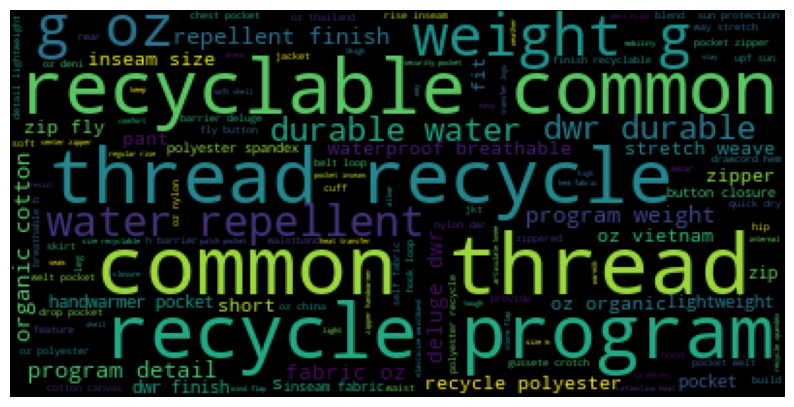


Cluster 0 :


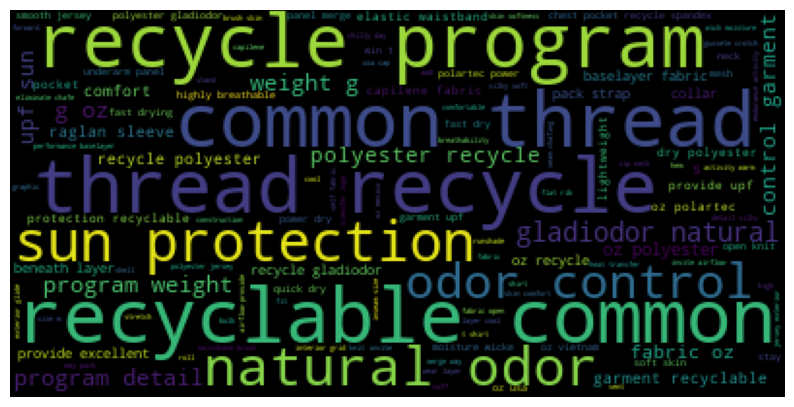


Cluster 5 :


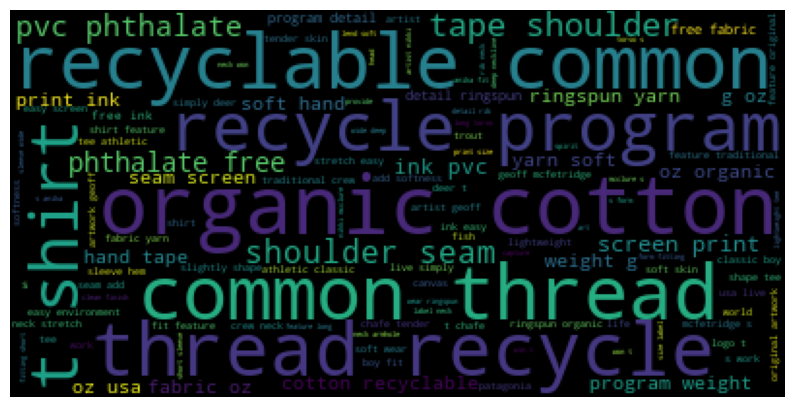


Cluster 2 :


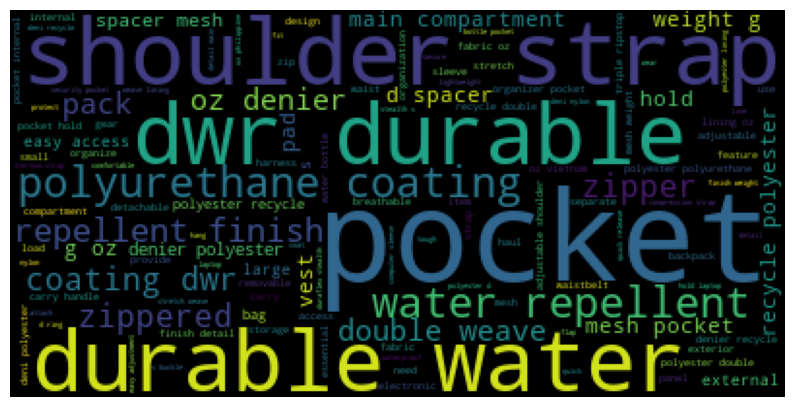


Cluster 10 :


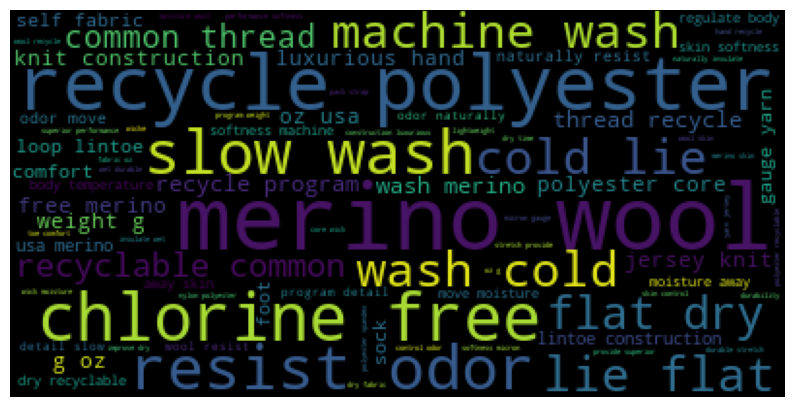

In [186]:
# Create the list of clusters excluding outliers
clusters_id = [x for x in corpus["cluster"].value_counts().index.to_list() if x != -1]

# Instanciate WordCloud
wd = wordcloud.WordCloud()

# Iterate on the clusters_id list, too get the 5 biggest one and print the associate WordCloud
for cluster_id in clusters_id[:5] :

    docs = " ".join(corpus.loc[corpus["cluster"]==cluster_id,"vectorizer_ready"])

    cloud = wd.generate(docs)

    print(f"Cluster {cluster_id} :")

    plt.figure(figsize = (10, 10))
    plt.imshow(cloud)
    plt.axis("off")
    plt.show()
    print()

## Recommender system

Creating a function taking a product id as argument and returning 5 similar product ids, based on their cluster.

In [ ]:
# Function declaration
def find_similar_items(item_id) :
    
    # Get cluster id related to the product id entered by user
    cluster = corpus.loc[corpus.index==item_id, "cluster"].values[0]

    # Return an empty pandas Series since the cluster -1 isn't really a cluster, but outliers
    if cluster == -1 :
        return pd.Series()
    
    # Return a pandas Series of 5 random ids of products which have the same cluster id
    return corpus.loc[corpus["cluster"]==cluster,:].sample(5).index

Creating a sequence using `input` where the user can enter the product id in order to get his description. Using the function `find_similar_items` previously made, we'll suggest related product.

In [ ]:
# User input
product_id = int(input("What would you like to buy ? Enter the product id :"))
print()

try :
    # Try to retrieve the description of the product selected by the user
    product_description = corpus.loc[corpus.index==product_id, "description"].values[0]

except :
    # Throw an error if the id isn't in our DataFrame
    print(f"Product with id {product_id} not found.")

else :
    # Print the product description
    print("Product found :")
    print("Id | Description")
    print(f"{id} | {product_description}")
    print()

    # Create the id Series of similar products
    recommanded_products_id = find_similar_items(product_id)

    # Check if the Series is not empty (in case of the product selected doesn't belong to a cluster, i.e. cluster equal to -1)
    if not recommanded_products_id.empty :

        # Print the similar products description
        print("You may also like : ")
        print("Id | Description")
        for id in find_similar_items(product_id) :
                
            print(f"{id} | {corpus.loc[corpus.index==id, "description"].values[0]}")



Product found :
Id | Description
263 | Cotton board shorts - A classic in fabric and form, the 5.6-oz 100% organic cotton brushed canvas of these board shorts provides lightweight durability in and out of the water, with a pattern inspired by plantation-era cane field workshirts. A self-fabric waistband and flat-lying 2-button fly are cleanly styled, and the flapped patch pocket with metal button closure has double-needle stitched seams. Inseam (size 32) is 10"; outseam is 20". Recyclable through the Common Threads Recycling Program.   Details:    A Hawaiian classic in fabric and form   Fabric pattern inspired by plantation-era cane field workshirts   Self-fabric waistband with a flat-lying 2-button fly   Flapped patch pocket with metal button closure and double-needle stitched seams   "Inseam (size 32) is 10""; outseam is 20"""   Now available in size 29     Fabric:  5.6-oz 100% organic cotton brushed canvas. Recyclable through the Common Threads Recycling Program   Weight:  (222 g 7